In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the style 
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})

## LoRA Loss Chart

In [3]:
# Load the training data
# Using relative paths assuming the notebook is in the 'notebooks' directory
df1 = pd.read_csv('../assets/training/loss_lora_merged_1.csv')
df2 = pd.read_csv('../assets/training/loss_lora_merged_2.csv')

In [4]:
# Clean and combine the data
# Filter out the '0' step from the resumed run 
df2 = df2[df2['Step'] >= 30000]
df_loss = pd.concat([df1, df2]).reset_index(drop=True)

In [5]:
# Prepare smoothed data for a cleaner trend line (window of 10 = 1000 steps)
loss_col = 'ur-tasks-merged-lora - loss'
df_loss['loss_smoothed'] = df_loss[loss_col].rolling(window=10).mean()

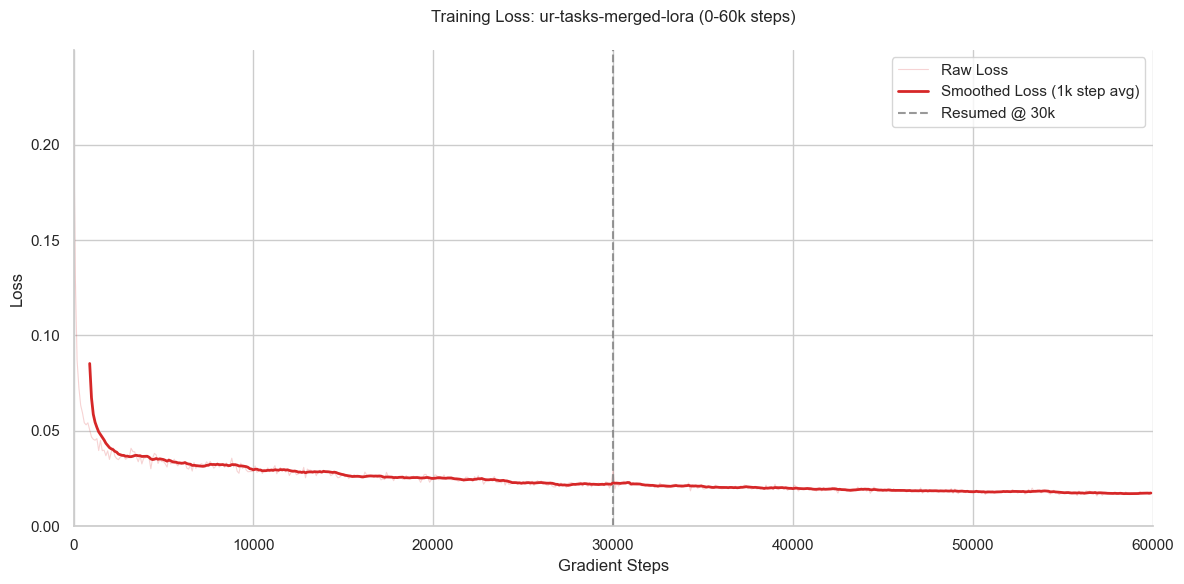

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot raw loss with low alpha
sns.lineplot(
    data=df_loss, 
    x="Step", 
    y=loss_col, 
    color="#d62728", 
    alpha=0.2, 
    linewidth=0.8, 
    label='Raw Loss'
)

# Plot smoothed trend line
sns.lineplot(
    data=df_loss, 
    x="Step", 
    y="loss_smoothed", 
    color="#d62728", 
    linewidth=2, 
    label='Smoothed Loss (1k step avg)'
)

# Formatting
plt.title("Training Loss: ur-tasks-merged-lora (0-60k steps)", pad=20)
plt.xlabel("Gradient Steps")
plt.ylabel("Loss")
plt.xlim(0, 60000)
plt.ylim(0, df_loss[loss_col].max() * 1.1)  # Focus on the data range
plt.legend(frameon=True, loc='upper right')

sns.despine()
plt.tight_layout()
plt.show()